# Part I - (Ford GoBike Dataset Exploration)
## by (Joan Njeri)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#import the dataset and print top 5 rows
df = pd.read_csv("201902-fordgobike-tripdata.csv")

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# investigate the dimentinality of the df
df.shape

(183412, 16)

In [4]:
#investuigate the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
#investigate the statistical summary of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### What is the structure of your dataset?

> The data includes information about 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area and 16 fetatures that includes 'duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name'and some additional variables.

### What is/are the main feature(s) of interest in your dataset?

> I would like to learn more about the duration of the bike trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the duration of a trip to be mostly dependent on the age and gender of the user, as well as where the trip started and ended. Therefore, I think that the most important features for my investigation are (duration_sec, age, start_hour, start_station_name, end_station_name, user_type, member_gender and bike_share_for_all_trip)

## Univariate Exploration

### Investigate distributions of individual variables and Cleaning


In [7]:
# check for nulls in the data
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Drop the nulls
df.dropna(inplace = True)

#Test
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
#checking for duplicates
df.duplicated().sum()

0

In [10]:
# we running df.info() columns start_time and end_time have object type
# we convert them into datatime and extract the year from start time

df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

# extract year from start time
df['year'] = df.start_time.dt.year

#now check the year distribution 
df.year.unique()

array([2019])

### Feature engineering
> let's calculate the ages for the riders

> Note the start year is 2019 so we will calculate the riders ages as of 2019

In [11]:
# member _birth_year is type float. 
# get the age and convert to int type

df['age'] = (2019 - df.member_birth_year).astype(int)

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019,60


In [12]:
tempage = df[df.age > 100]
tempage.shape

(72, 18)

In [13]:
#remove outliers whose age is greater than 100 years
df= df[df.age < 100]

In [14]:
#calculate duration in mins
df["duration_min"] = round(df.duration_sec/60, 2)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019,35,869.75
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019,47,1030.90
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019,30,608.17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019,45,26.42
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019,60,29.88


In [15]:
temp = df[df.duration_min > 200]
temp.shape

(298, 19)

In [16]:
df = df[df.duration_min < 200]
df.shape

(174582, 19)

#### Plot the distribution of the duration_sec

In [17]:
# Define a default figure size if not stated
import matplotlib

matplotlib.rcParams['figure.figsize'] = (8, 6)

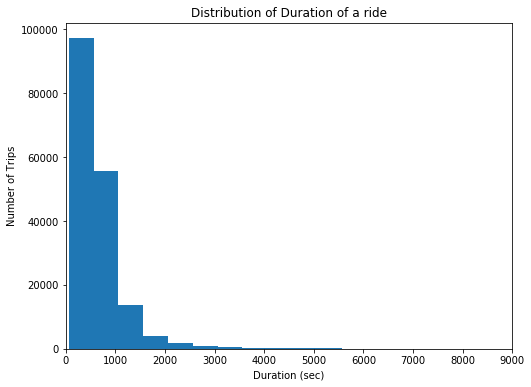

In [18]:
#plotting the distribution in sec
bins=np.arange(df['duration_sec'].min(), df['duration_sec'].max()+500, 500)

plt.hist(data=df, x='duration_sec', bins=bins)
plt.title('Distribution of Duration of a ride')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xlim((0, 9000));

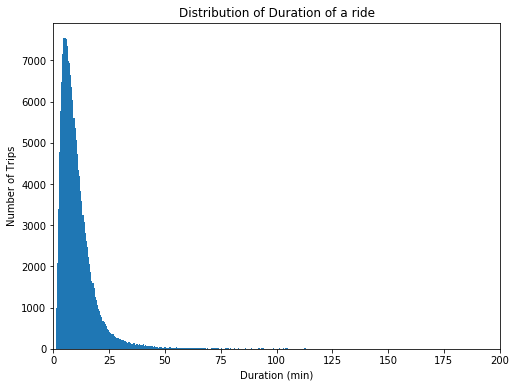

In [19]:
#plotting the distribution in min
bins=np.arange(df['duration_min'].min(), df['duration_min'].max()+0.5, 0.5)

plt.hist(data=df, x='duration_min', bins=bins)
plt.title('Distribution of Duration of a ride')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xlim((0, 200));

#### Note the duration has a long tail towards the right and thus lets use log scale  

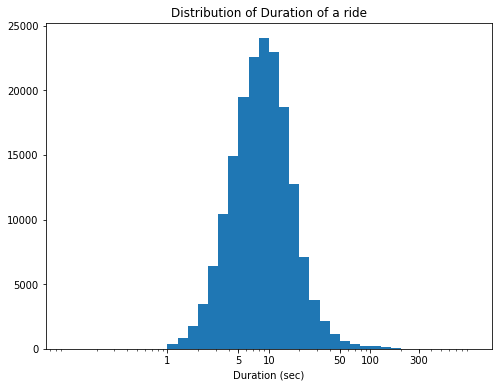

In [20]:
#Get the ticks for bins between 0 and the maximum dutation
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks for the graph
ticks = [1, 5, 10, 50, 100, 300]
# Convert ticks into string values and to be displayed on the X axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=df, x='duration_min', bins=bins);
#transform X-axis to a log scale
plt.xscale('log')
plt.title('Distribution of Duration of a ride')
plt.xlabel('Duration (sec)')

# Apply x-ticks
plt.xticks(ticks, labels);

#### Insights:
> The duration of time it takes to ride a bike can be described by a uniform distribution, highest peak being at 10 minutes

#### Plot the distribution of the riders age

In [21]:
""""Function that generate the plot on log scale"""

def plothist(ticks,bin_size,df,x ):
    # Generate the x-ticks for the graph
    ticks = ticks
    # Convert ticks into string values and to be displayed on the X axis
    labels = ['{}'.format(v) for v in ticks]

    bin_size = bin_size
    bins=np.arange(df[x].min(), df[x].max()+bin_size, bin_size)
    plt.hist(data=df, x=x, bins=bins)
    plt.xscale('log')
    plt.xlabel(x)
    # Apply x-ticks
    plt.xticks(ticks, labels);

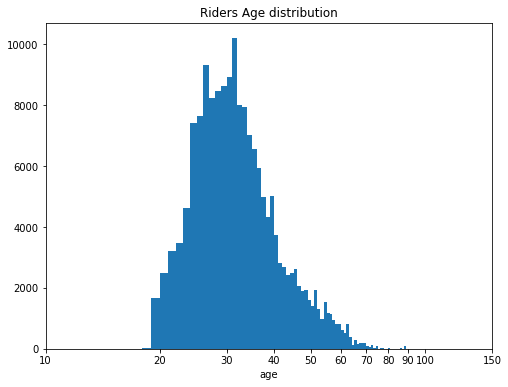

In [22]:
plt.title("Riders Age distribution")
plothist(ticks= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], bin_size = 1, df = df, x = 'age')

#### Insights:
> Age distribution is more concentrated between 25 to 40 years old

### Categorical varibles distribution

#### Plot the distribution of the user type

In [23]:
# checking distribution of types users

# let's explore the user_type
user_type = df.groupby(['user_type']).size().reset_index().rename(columns = {0: 'user_count'})
user_type

,user_type,user_count
0,Customer,16431
1,Subscriber,158151


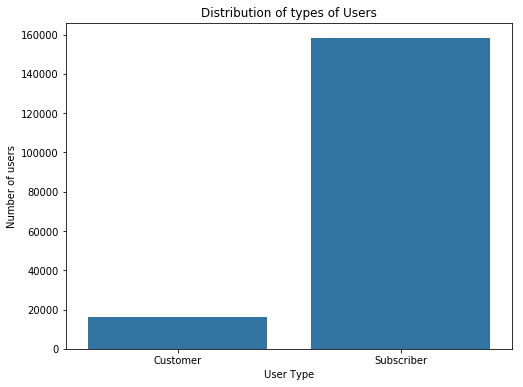

In [24]:
#plot a bar plot of the user type
sns.barplot(x= 'user_type', y = 'user_count' , data = user_type, color = sns.color_palette()[0])
plt.ylabel('Number of users')
plt.xlabel('User Type')
plt.title('Distribution of types of Users');

#### Insights:
> The highest percentage of the user type bike riders are subscribers

#### Plot the distribution of gender

In [25]:
# checking distribution of gender

# let's explore the gender
gender = df.groupby(['member_gender']).size().reset_index().rename(columns = {0: 'gender_count'})
gender

,member_gender,gender_count
0,Female,40701
1,Male,130260
2,Other,3621


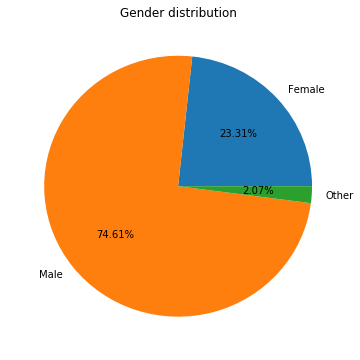

In [26]:
#plot the distribution
plt.figure(figsize = (6,6))
plt.pie(gender.gender_count, labels= gender.member_gender,  autopct= "%.2f%%")
plt.title('Gender distribution');

#### Insights:
> The 74.61 percent of the bike riders are male

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Duration takes a large amount of values, and the tail is concentrated to 10 minutes. I therefore used logarithmic transformation and found that peak occurs at 10 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. I plotted the duration in seconds and the x scale was quite large and difficult to understand, so I changed the duration from seconds to minutes by dividing it by 60 and removed the outliers that is value whose mins is greater than 200. 
2. I converted start time to datetime and extracted year from start time to get the end year of our dataset which I realized is 2019. The got the age by calculating the difference between 2019 and member_birth_year and removed the outliers that is ages greater than 100

## Bivariate Exploration

> Plot the correlation between duration and age

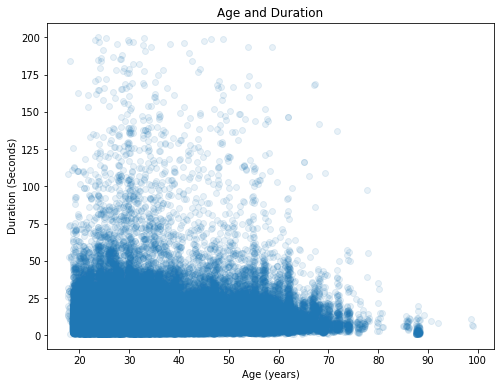

In [27]:
sns.regplot(data=df,x='age',y='duration_min',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/10})
plt.xlabel('Age (years)')
plt.ylabel('Duration (Seconds)')
plt.title('Age and Duration');

#### Insights:
> Duration and age has a weak negative relationship indicating the older the user, the shorter the duration of the trip

#### Plot the distribution between member_gender and duration_min

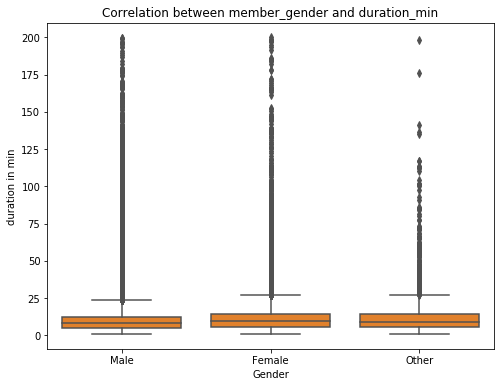

In [28]:
sns.boxplot(x ='member_gender' , y = 'duration_min', data=df, color=sns.color_palette()[1])
plt.title("Correlation between member_gender and duration_min")
plt.xlabel('Gender')
plt.ylabel('duration in min');

#### Insights:
> males roughly takes shorter durations compared to females 

#### Plot the distribution between age and user type

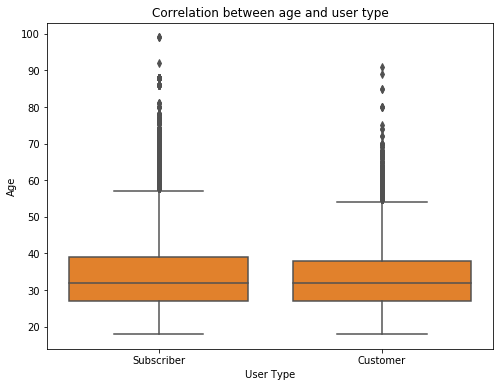

In [29]:
sns.boxplot(x ='user_type' , y = 'age', data=df, color=sns.color_palette()[1])
plt.title("Correlation between age and user type")
plt.xlabel('User Type')
plt.ylabel('Age');

#### Insights:
> Subscribers has wider age distributions as compared to customers 

#### Plot the distribution user type and gender

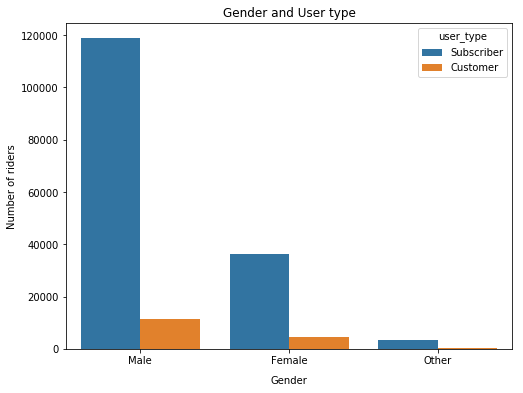

In [30]:
sns.countplot(data=df,x='member_gender',hue='user_type')
plt.xlabel('Gender',labelpad=10)
plt.ylabel('Number of riders')
plt.title('Gender and User type');

#### Insights:
> males subscribers have the highest number of bike riders

#### Plot the distribution user type and bike_share_for_all_trip

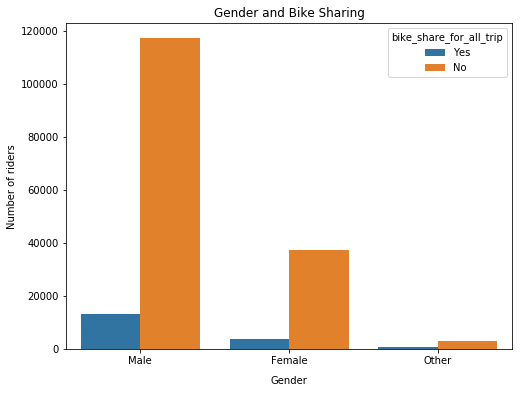

In [31]:
sns.countplot(data=df,x='member_gender',hue='bike_share_for_all_trip')
plt.xlabel('Gender',labelpad=10)
plt.ylabel('Number of riders')
plt.title('Gender and Bike Sharing');

#### Plot the distribution user type and duration

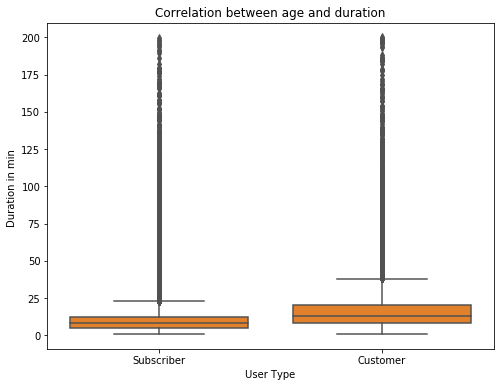

In [32]:
sns.boxplot(x ='user_type' , y = 'duration_min', data=df, color=sns.color_palette()[1])
plt.title("Correlation between age and duration")
plt.xlabel('User Type')
plt.ylabel('Duration in min ');

#### Insights:
> Customers take longer duartions as compared to subscribers 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Bike riders age distribution is more concentrated between 25 to 40 years old

> Customers take longer duartions as compared to subscribers

> 74.61 percent of the bike riders are male

> The highest percentage of the user type bike riders are subscribers

> males subscribers have the highest number of bike riders

> males roughly takes shorter durations compared to females

> The duration of time it takes to ride a bike can be described by a uniform distribution, highest peak being at 10 minutes

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Duration and age has a weak negative relationship indicating the older the user, the shorter the duration of the trip and vise versa

> Customers take longer duartions as compared to subscribers whereelse the expectation was subscribers takes longer trips 

## Multivariate Exploration

#### Plot the Relationship between age, duration and gender

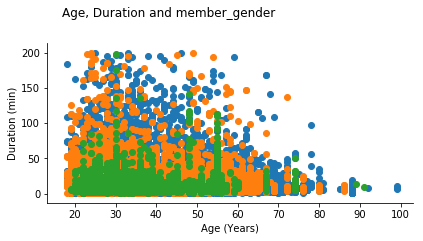

In [46]:
def scatterchart(col):
    grid = sns.FacetGrid(data=df,hue=col, aspect = 2, margin_titles = True)
    grid.map(plt.scatter,'age','duration_min')
    plt.xlabel('Age (Years)')
    plt.ylabel('Duration (min)')
    plt.suptitle('Age, Duration and ' + col ,x=0.4,y=1.1)
    
scatterchart('member_gender');

#### Insights:
> It's hard to make an interpretion from the chart above, therefore lets separate the records for each gender 

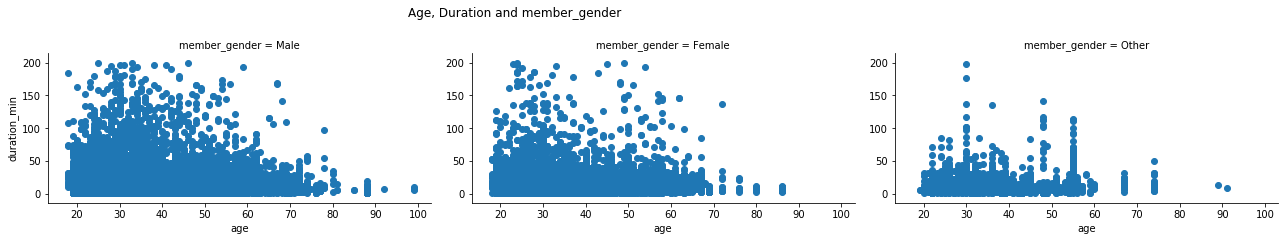

In [47]:
def scatterseparate(col):
    grid = sns.FacetGrid(data=df,col=col, aspect = 2, margin_titles = True)
    grid.map(plt.scatter,'age','duration_min')
    plt.suptitle('Age, Duration and ' + col ,x=0.4,y=1.1)
    
    
scatterseparate('member_gender');

#### Insights:
> For, all gender younger riders between 25 and 40 have higher suration as compared to riders between 65 and above

#### Plot the Relationship between age, duration and user type

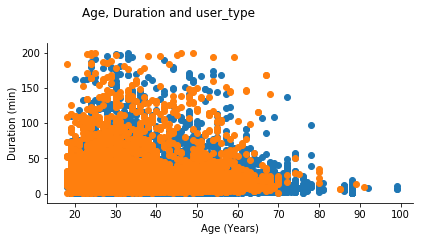

In [48]:
scatterchart('user_type');

#### Insights:
> It's hard to make an interpretion from the chart above, therefore lets separate the records for user_type 

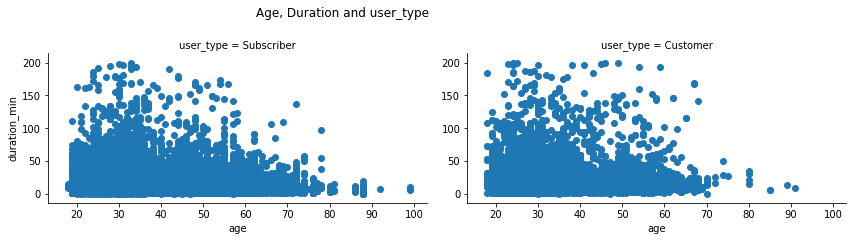

In [45]:
def scatterseparate(col):
    grid = sns.FacetGrid(data=df,col=col, aspect = 2, margin_titles = True)
    grid.map(plt.scatter,'age','duration_min')
    plt.suptitle('Age, Duration and ' + col ,x=0.4,y=1.1)
    
    
scatterseparate('user_type');

#### Insights:
> For, all gender younger riders between 25 and 40 have higher suration as compared to riders between 65 and above

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Riders above the age of 65 years have shorter durations while younger riders between 25 and 40 have higher durations

### Were there any interesting or surprising interactions between features?

> Customers bike riders are relatively younger compared to subscribers

## Conclusions
> Both age and gender are important factors to the bike riders, and although we expect subscriber to take lead in trip duration customers have higer durations.
